 Math with Python

1. Even Odd Vending Machine

In [ ]:
def even_odd(n):
  # python built-in function is used to check
  # if passed number is integer or not.

  if not isinstance(n, int):
    print('Please, enter only integer number: ')
# the modulus will check if number passed to even_odd function is even or odd

  if n % 2 == 0:
    print('Even')
    start = int(n)
  else:
    print('Odd')
    start = int(n)

  for i in range(start, start + 20, 2):
    print(i)

# main function
if __name__ == '__main__':

#prompts the user for input a number
  feedMeInt = int(input('Please, input a number: '))
  even_odd(feedMeInt)



Please, input a number: 1
Odd
1
3
5
7
9
11
13
15
17
19


2. Exploring a Quadratic Function Visually

x = -4 y = 9 
x = -3 y = 4 
x = -2 y = 1 
x = -1 y = 0 
x = 0 y = 1 
x = 1 y = 4 
x = 2 y = 9 
x = 3 y = 16 
x = 4 y = 25 
x = 5 y = 36 


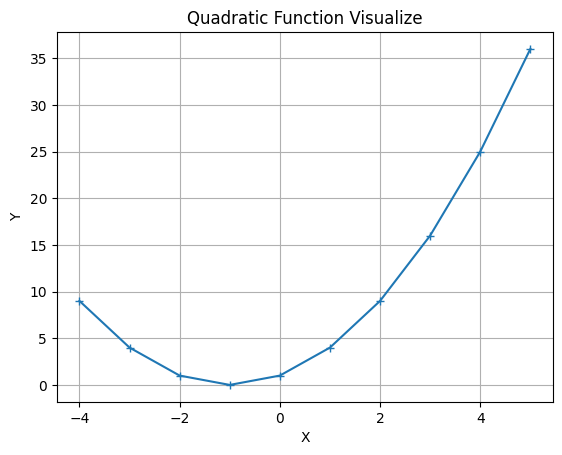

In [ ]:
import matplotlib.pyplot as plt
x_values = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

# created 2 empty lists to hold the x and y values
x_list = []
y_list = []

# iterate through x_values using for loop
for x in x_values:
  # plugin the x values in the quadratic equation
  y = x**2 + 2*x +1

  # Now, store the x and y values in their respective lists
  # use python built-in append function
  x_list.append(x)
  y_list.append(y)
  # Display the x and its corresponding value of y
  print('x = {0} y = {1} '.format(x,y))
# plotting part
plt.plot(x_list, y_list, marker = '+')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Function Visualize')
plt.grid(True)
plt.show()

3. Statistics Calculator reads data from (mydata.txt)

In [ ]:
from numpy import median
from numpy.core.fromnumeric import mean
from collections import Counter
import math

def read_data(filename):

  numbers = []
  with open(filename) as f:
    for line in f:
      numbers.append(float(line))
  return numbers

def calculate_mean(numbers):
  s = sum(numbers)
  N = len(numbers)
  mean = s/N

  return mean
def calculate_median(numbers):
  N = len(numbers)
  numbers.sort()

  if N % 2 ==0:
    # if N is even
    m1 = N/2
    m2 = (N/2) + 1
    # parse to intger and subtract 1 because index starts from 0
    m1 = int(m1) - 1
    m2 = int(m2) - 1
    median = (numbers[m1] + numbers[m2]) / 2
  else:
    m = (N + 1) / 2
    m = int(m) - 1
    median = numbers[m]

  return median

def calculate_mode(numbers):
  c = Counter(numbers)
  mode = c.most_common(1)
  return mode[0][0]

# finding variance involves calling two different functions they are
#   find_differences, and calculate_mean
# Lets start with finding differences of the numbers from the mean value
def calculate_differences(numbers):
  mean = calculate_mean(numbers)

  # calculate the differences
  diff = []
  for num in numbers:
    diff.append(num - mean)
  return diff

# calculate variance
def calculate_variance(numbers):
  # find the squared differences
  diff = calculate_differences(numbers)
  # square the differences
  squared_diff = []
  for d in diff:
    squared_diff.append(d**2)

    # variance
    sum_squared_diff = sum(squared_diff)
    vairance = sum_squared_diff/len(numbers)
    return vairance
def calculate_standard_dev(numbers):
  variance = calculate_variance(numbers)
  std = math.vairance.sqrt(variance)
  return std

#main function
  if __main__ == '__main__':
    numbers = read_data_text('mydata.txt')

    mean = calculate_mean(numbers)
    median = calculate_median(numbers)
    mode = calculate_mode(numbers)
    variance = calculate_variance(numbers)
    std_dev = calculate_standard_dev(numbers)

    print('Mean: {0}'.format(mean))
    print('Median: {0}'.format(median))
    print('Mode: {0}'.format(mode))
    print('Variance: {0}'.format(variance))
    print('Standard Deviation: {0}'.format(std_dev))



4. Law Of Large Numbers

In [ ]:
import random
def roll_dice(num_rolls):
  total = 0

  for roll in range(num_rolls):
    roll = random.randint(1, 6)
    total += roll
  return total / num_rolls

if __name__ == '__main__':
  expected_value = 3.5
  trials_num = [100, 1000, 10000, 100000, 500000]

  print('Expected value: ', expected_value)

  for trials in trials_num:
    trial_avg = roll_dice(trials)
    print('Trials: {0} Trial average: {1}'.format(trials, trial_avg))

Expected value:  3.5
Trials: 100 Trial average: 3.46
Trials: 1000 Trial average: 3.488
Trials: 10000 Trial average: 3.5133
Trials: 100000 Trial average: 3.50901
Trials: 500000 Trial average: 3.498584


Implementing Gradient Descent

In [15]:
from sympy import Derivative, Symbol, sympify
from sympy.core.sympify import SympifyError
import matplotlib.pyplot as plt
import numpy as np

def grad_descent(x0, f1x, x):
  # algorithm will continue iterating untill the absolute difference between
  #   consecutive variable values becomes smaller than'0.000001'
  epsilon = 1e-6
  # The step size determines how much the parameter or variable
  #   being optimized is updated at each iteration.
  step_size = 1e-4
  x_old = x0
  x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
# store intermediate values for plotting
  intermediate_values = [(x0, f1x.subs({x: x0}).evalf())]

  while abs(x_old - x_new) > epsilon:
    x_old = x_new
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
    intermediate_values.append((x_new, f1x.subs({x: x_new}).evalf()))
  return x_new, intermediate_values

  if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var1 = input('Enter the variable to differentiate with respect to: ')
    var2 = float(input('Enter the initial value of the variable: '))

    try:
      f = sympify(f)
    except SympifyError:
      print('Invalid function entered')
    else:
      var1 = Symbol(var1)
      d = Derivative(f, var1).doit()

      var_min, intermediate_values = grad_descent(var2, d, var1)
      # display minimum value and plot intermediate values
      print('{0}: {1}'.format(var1.name, var_min ))
      print('Minimum value: {0}'.format(f.subs({var1: var_min})))

      x_vals, y_vals = zip(*intermediate_values)
      plt.plot(x_vals, y_vals, marker = '+')
      plt.xlabel(var1.name)
      plt.ylabel('Y: {0}'.format(var1.name))
      plt.title("Gradient Descent")
      plt.show()